In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [2]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = [2**i for i in range(10)]

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [3]:
# Setting the directories

modelsfolder, resultsfolder = auxLib.folders(directory=os.path.join(os.getcwd(), datetime.today().strftime('%Y-%m-%d'), 'ferro'))

# Synthetic data (only FERRO training)

In [4]:
# Initialize the synthetic image generator

data = auxLib.SyntheticImagesGen(training=['ferro'], L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.332883358001709 seconds
Generating synthetic data...
Done!
Elapsed time: 0.015625 seconds


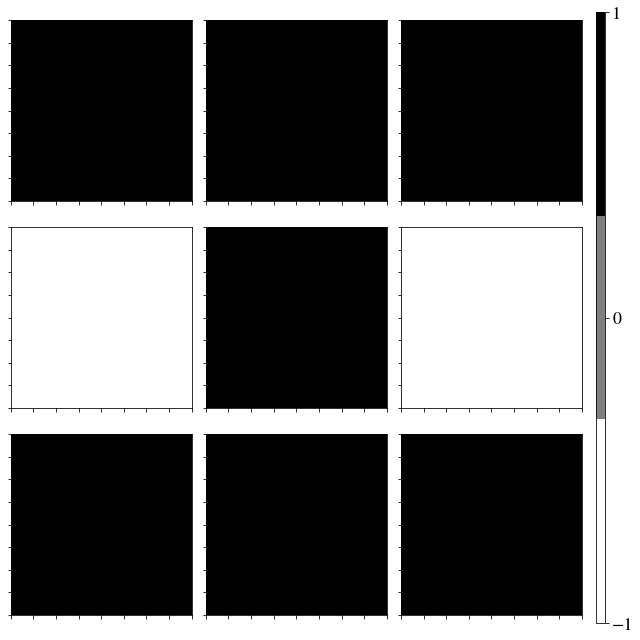

In [5]:
# Random graphs to show how to plot them

lattices_to_graph = [train_images[10 * i].reshape((L, L)) for i in range(9)]

auxLib.latticeGraph(lattices_to_graph, L)

# Neural Network

In [18]:
# Generate DNN models

for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
    np.random.seed(seed)
    if neuron==1 or neuron==2:
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    else:   
        kernel_regularizer=tf.keras.regularizers.l2(0.01)

    dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

    dnn.build_model((L*L,), num_classes=4, layers=[
    {'type': 'dense', 'units': neuron, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
    {'type': 'dropout', 'rate': 0.2},
    {'type': 'dense', 'units': 4, 'activation': 'softmax'}
    ])

    dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn.summary()

    dnn.fit(train_images, train_labels, 
            epochs=50, batch_size=20,
            validation_data=(test_images, test_labels), 
            callbacks=[callbacks],
            verbose=False)
    
    dnn.save_weights(f'dnn_all_n{neuron}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
    dnn.save_model(f'dnn_all_n{neuron}_DO02', directory=modelsfolder)

Generating DNN models:   0%|          | 0/10 [00:00<?, ?neuron/s]

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 1601      
                                                                 
 dropout_10 (Dropout)        (None, 1)                 0         
                                                                 
 dense_21 (Dense)            (None, 4)                 8         
                                                                 
Total params: 1609 (6.29 KB)
Trainable params: 1609 (6.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Generating DNN models:  10%|█         | 1/10 [00:48<07:18, 48.74s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n1_DO02.h5
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 2)                 3202      
                                                                 
 dropout_11 (Dropout)        (None, 2)                 0         
                                                                 
 dense_23 (Dense)            (None, 4)                 12        
                                                                 
Total params: 3214 (12.55 KB)
Trainable params: 3214 (12.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  20%|██        | 2/10 [01:40<06:43, 50.47s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n2_DO02.h5
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 6404      
                                                                 
 dropout_12 (Dropout)        (None, 4)                 0         
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
Total params: 6424 (25.09 KB)
Trainable params: 6424 (25.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  30%|███       | 3/10 [02:33<06:00, 51.47s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n4_DO02.h5
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 8)                 12808     
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
Total params: 12844 (50.17 KB)
Trainable params: 12844 (50.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n8_DO02.h5


Generating DNN models:  40%|████      | 4/10 [02:36<03:14, 32.39s/neuron]

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                25616     
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 4)                 68        
                                                                 
Total params: 25684 (100.33 KB)
Trainable params: 25684 (100.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  50%|█████     | 5/10 [02:43<01:56, 23.28s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n16_DO02.h5
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                51232     
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 4)                 132       
                                                                 
Total params: 51364 (200.64 KB)
Trainable params: 51364 (200.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  60%|██████    | 6/10 [02:46<01:05, 16.44s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n32_DO02.h5
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                102464    
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 4)                 260       
                                                                 
Total params: 102724 (401.27 KB)
Trainable params: 102724 (401.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  70%|███████   | 7/10 [02:49<00:35, 11.93s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n64_DO02.h5
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               204928    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 516       
                                                                 
Total params: 205444 (802.52 KB)
Trainable params: 205444 (802.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  80%|████████  | 8/10 [02:53<00:19,  9.54s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n128_DO02.h5
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               409856    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 410884 (1.57 MB)
Trainable params: 410884 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  90%|█████████ | 9/10 [03:13<00:12, 12.76s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n256_DO02.h5
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               819712    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 821764 (3.13 MB)
Trainable params: 821764 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models: 100%|██████████| 10/10 [03:54<00:00, 23.45s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n512_DO02.h5


In [33]:
# Initialize the DenseNeuralNetworkGen instance
dnn = auxLib.DenseNeuralNetworkGen()

# Load the model
dnn.load_model('dnn_all_n2_DO02', directory=modelsfolder)

# Load the weights
dnn.load_weights('dnn_all_n2_DO02', directory=modelsfolder)  # Load the weights directly on the same instance

Model "dnn_all_n2_DO02" correctly loaded from d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n2_DO02.h5
Weights of the model "dnn_all_n2_DO02" correctly loaded from d:\Facultad\Doctorado\Proyectos\paper\2024-08-17\models\dnn_all_n2_DO02_weights.h5


# Loading simulated images to test the NN

In [37]:
# Initializing loader and saver

loader_init = auxLib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:02<00:00, 52.31array/s]

Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:16<00:00,  9.62repetitions/s]


Prediction for 1 neurons in hidden layer
T_c = 0


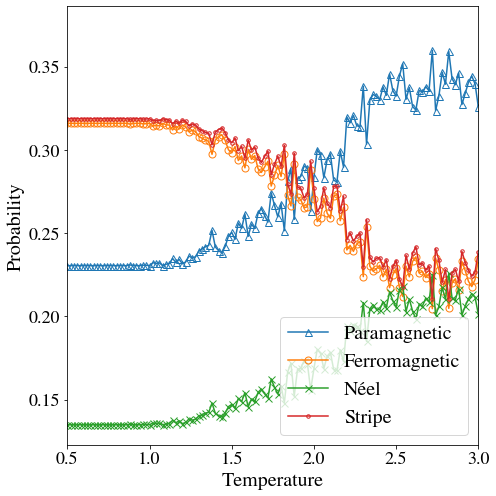

Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.35repetitions/s]


Prediction for 2 neurons in hidden layer
T_c = 0


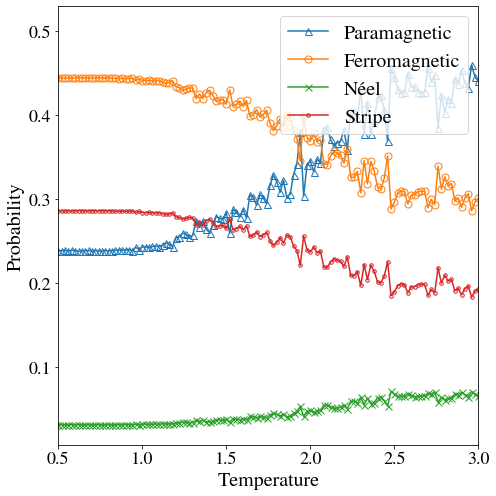

Predicting: 100%|██████████| 155/155 [00:14<00:00, 11.03repetitions/s]


Prediction for 4 neurons in hidden layer
T_c = 1.8287232837204512


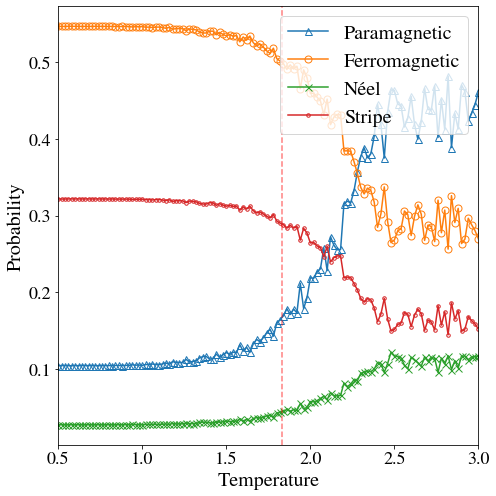

Predicting: 100%|██████████| 155/155 [00:16<00:00,  9.29repetitions/s]


Prediction for 8 neurons in hidden layer
T_c = 2.3945805747387237


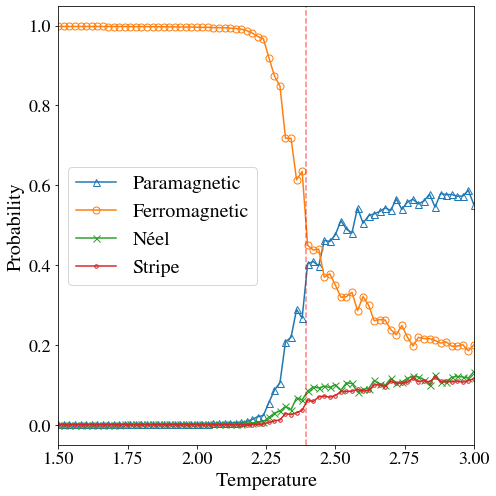

Predicting: 100%|██████████| 155/155 [00:14<00:00, 10.45repetitions/s]


Prediction for 16 neurons in hidden layer
T_c = 2.4134833012913837


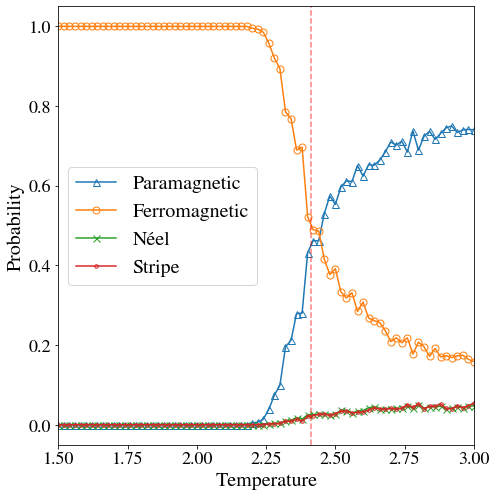

Predicting: 100%|██████████| 155/155 [00:12<00:00, 12.07repetitions/s]


Prediction for 32 neurons in hidden layer
T_c = 2.3926090209507107


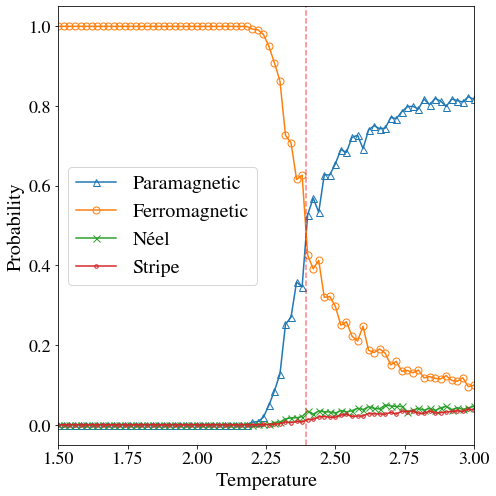

Predicting: 100%|██████████| 155/155 [00:15<00:00,  9.70repetitions/s]


Prediction for 64 neurons in hidden layer
T_c = 2.443006805928183


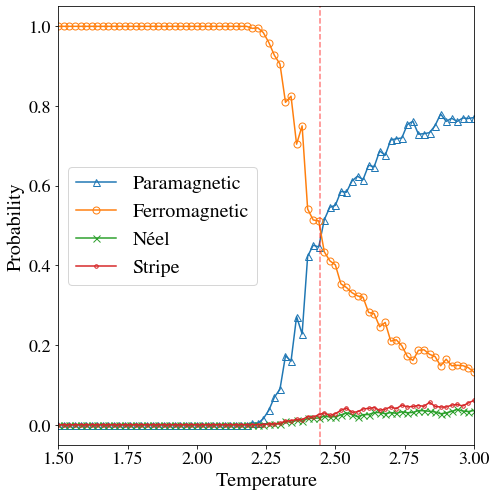

Predicting: 100%|██████████| 155/155 [00:13<00:00, 11.51repetitions/s]


Prediction for 128 neurons in hidden layer
T_c = 2.391704896533589


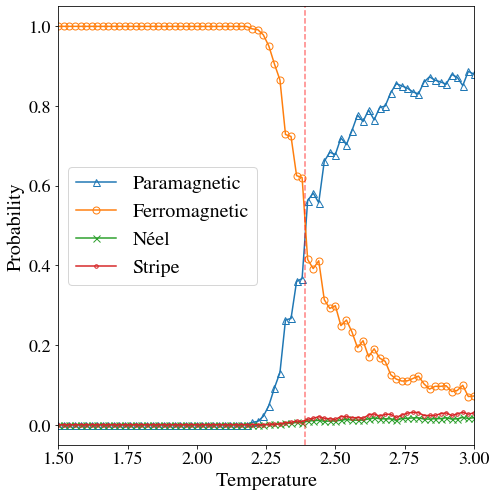

Predicting: 100%|██████████| 155/155 [00:13<00:00, 11.19repetitions/s]


Prediction for 256 neurons in hidden layer
T_c = 2.3100364021810003


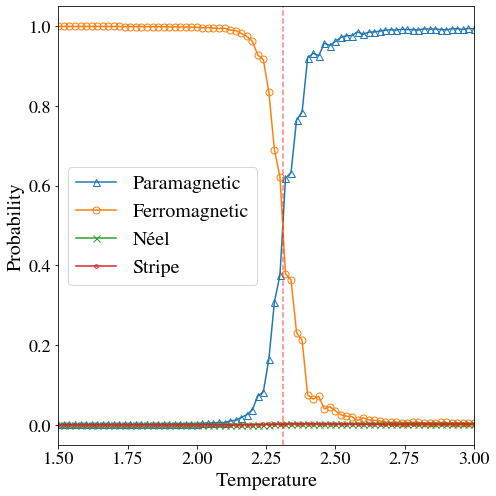

Predicting: 100%|██████████| 155/155 [00:16<00:00,  9.39repetitions/s]


Prediction for 512 neurons in hidden layer
T_c = 2.309800264523148


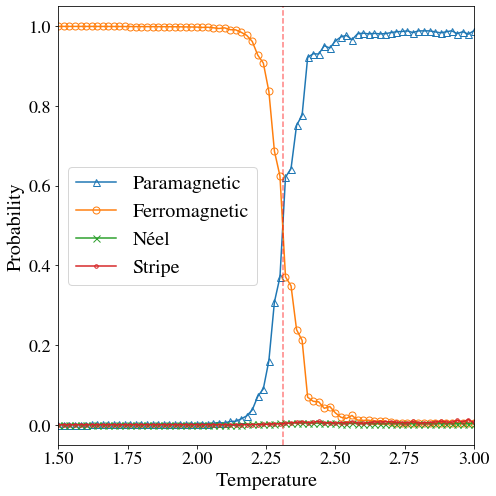

In [40]:
critical_temperatures = []

for neuron in neurons:
    index = neurons.index(neuron)

    model_path = os.path.join(os.getcwd(), modelsfolder, f'dnn_all_n{neuron}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, neuron, 
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)

    para, ferro, neel, stripe = prediction.T

    print(f'Prediction for {neuron} neurons in hidden layer')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, neel, 'x-', label='Néel', markerfacecolor='none', markersize=7)
    plt.plot(temperature, stripe, '.-', label='Stripe', markerfacecolor='none', markersize=7)
    
    if neuron<8:
        plt.xlim((0.5, 3))
    else:
        plt.xlim((1.5, 3))
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(os.getcwd(), resultsfolder, f'{neuron}neurons.pdf'))
    plt.show()

# Transition temperatures

In [52]:
critical_temperatures

In [53]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(10,1), 
                                    np.array(critical_temperatures).reshape(10,1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.csv'), index=False)

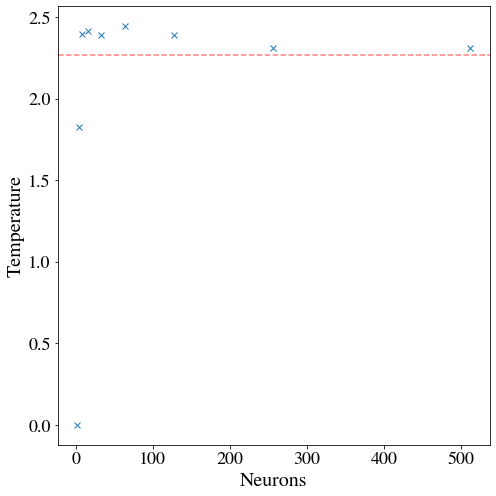

In [54]:
temp = pd.read_csv(os.path.join(os.getcwd(), resultsfolder, f'critical_temperatures.csv'))

plt.figure(figsize=(7, 7))
plt.plot(temp['Neurons'][1:],temp['Temperature'][1:],'x')
plt.axhline(y=2.269, color = 'red', linestyle = '--', alpha = 0.5)
plt.xlabel('Neurons')
plt.ylabel('Temperature')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.pdf'))
plt.show()

# When talking about percolation

In [ ]:
datadf = {"Densidad":densities, "Temperatura":critical_temperatures}

temp_df = pd.DataFrame(datadf)

temp_df.to_csv(os.path.join(os.getcwd(), resultsfolder, 'temp_dnn_all.csv'), index=False)

densi = np.arange(0.0,1.002,0.002)
curva = densi*0
for i in range(len(densi)):
    if densi[i]<0.592746:
        curva[i] = 0
    elif densi[i]<0.89:
        curva[i] = -(0.983)/(np.log(densi[i]-0.592746))  
        last_i = i

for i in range(last_i, len(densi)):
     curva[i] = curva[last_i] + 1.7 * (densi[i]-densi[last_i])

#plt.figure(figsize=(10,7))
plt.plot(temp_df['Densidad'],temp_df['Temperatura']/2.269)#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(densi,curva,'r')
plt.xlim(0.4,1)
plt.legend(temp_df.columns)
plt.show()